In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.decomposition import PCA
from scipy.stats import pointbiserialr

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [ ]:
df['class'].value_counts()

P    89
H    85
Name: class, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode the 'class' column (P: patient with Alzheimer's, H: healthy)
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

In [ ]:
# Split the dataset into features (X) and the target (y)
#X = df.drop('ID', axis=1)
X = df.drop(['ID','class'], axis=1)
y = df['class']

In [ ]:
X

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,249.729085,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,77.258394,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,193.667018,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,163.065803,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,147.094679,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2930,0.000010,241.736477,176.115957,1839,6439,0.253347,0.174663,208.926217,0.032691,...,200.568126,0.119152,0.020909,4.508709,2.233198,96,44545,1798.923336,247448.3108,80335
170,2140,0.000009,274.728964,234.495802,2053,8487,0.225537,0.174920,254.612383,0.032059,...,231.243565,0.174495,0.017640,4.685573,2.806888,84,37560,1725.619941,160664.6464,345835
171,3830,0.000008,151.536989,171.104693,1287,7352,0.165480,0.161058,161.320841,0.022705,...,177.935566,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445
172,1760,0.000008,289.518195,196.411138,1674,6946,0.518937,0.202613,242.964666,0.090686,...,177.935566,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
169    0
170    0
171    0
172    0
173    0
Name: class, Length: 174, dtype: int64

In [ ]:
# Step 1: Calculate Point-Biserial Correlation with the Target Variable
correlations = []
for feature in X.columns:
    pb_corr, _ = pointbiserialr(X[feature], y)
    correlations.append([feature, abs(pb_corr)])
# sorting the correlations
correlations.sort(key=lambda x: x[1], reverse=True)

In [ ]:
# Calculate the mean of the second values (index 1) in each sub-array
values = [x[1] for x in correlations]
mean = sum(values) / len(values)

print("Mean:", mean)

Mean: 0.2046998651937911


In [ ]:
res = []
count = 0
for feature,value in correlations:
  if(value >= mean):
    res.append([feature,value])
    count += 1
print(count)

224


In [ ]:
# Step 2: Select Features based on Target Correlation
N = count

selected_features = [feature for feature, corr in correlations[:N]]  # Choose the top N features

In [ ]:
selected_features

['gmrt_in_air7',
 'mean_gmrt7',
 'disp_index23',
 'mean_speed_in_air7',
 'paper_time9',
 'air_time16',
 'mean_gmrt17',
 'total_time9',
 'disp_index22',
 'total_time3',
 'total_time16',
 'total_time13',
 'mean_speed_in_air17',
 'mean_acc_in_air17',
 'gmrt_on_paper17',
 'mean_jerk_in_air17',
 'total_time15',
 'mean_speed_in_air25',
 'gmrt_in_air17',
 'mean_speed_in_air23',
 'total_time6',
 'gmrt_in_air23',
 'pressure_var5',
 'paper_time15',
 'total_time2',
 'paper_time23',
 'pressure_mean8',
 'paper_time7',
 'air_time15',
 'paper_time17',
 'paper_time2',
 'air_time13',
 'pressure_mean9',
 'gmrt_in_air25',
 'air_time6',
 'mean_gmrt25',
 'paper_time10',
 'gmrt_on_paper7',
 'num_of_pendown9',
 'total_time10',
 'total_time8',
 'mean_acc_in_air7',
 'paper_time8',
 'disp_index2',
 'paper_time6',
 'disp_index17',
 'mean_jerk_in_air7',
 'pressure_mean6',
 'disp_index7',
 'paper_time12',
 'mean_gmrt23',
 'air_time21',
 'mean_speed_on_paper2',
 'total_time24',
 'mean_speed_on_paper17',
 'paper_tim

In [ ]:
X_filtered = X[selected_features]

In [ ]:
X_filtered

,gmrt_in_air7,mean_gmrt7,disp_index23,mean_speed_in_air7,paper_time9,air_time16,mean_gmrt17,total_time9,disp_index22,total_time3,...,mean_speed_on_paper12,gmrt_on_paper21,mean_gmrt20,mean_jerk_on_paper4,max_x_extension4,gmrt_on_paper3,max_y_extension7,mean_speed_on_paper13,mean_jerk_on_paper6,max_y_extension14
0,390.168619,509.758210,0.000009,7.937534,4850,3730,260.639185,4910,0.000009,15645,...,3.684920,51.289533,184.657717,0.013884,4353,106.611229,2459,0.931676,0.024257,2945
1,133.477130,125.402406,0.000011,2.753283,9485,10650,99.956691,15380,0.000012,27850,...,0.813366,62.267878,124.392030,0.013245,7718,107.648180,745,1.460130,0.011679,11755
2,273.908579,320.138692,0.000011,5.710285,6345,3265,261.046182,6970,0.000010,5530,...,1.233791,98.135857,140.261897,0.009972,3960,146.116295,677,1.381829,0.018881,6584
3,162.139813,158.026520,0.000010,3.426591,8335,9850,214.161758,22255,0.000009,13555,...,1.633895,71.647422,174.722050,0.016548,4487,75.711596,508,1.350798,0.019149,10056
4,420.384148,378.109428,0.000008,8.599255,4490,805,262.685522,7680,0.000008,11815,...,1.556667,79.418485,154.132809,0.015410,4429,70.517185,822,1.040535,0.015735,8071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,319.107406,374.553398,0.000009,6.438548,6610,1305,314.725420,7250,0.000008,5550,...,2.272496,124.681922,173.966233,0.015723,4250,164.142902,1382,4.599006,0.020869,7442
170,392.816132,289.993578,0.000009,7.545785,7730,2670,294.604223,8640,0.000009,9920,...,1.322522,105.802458,189.449463,0.013771,3935,207.551914,1232,2.411222,0.015831,6191
171,139.288717,205.491797,0.000010,2.831126,7465,915,294.604223,9535,0.000011,9005,...,1.322522,105.802458,198.413267,0.011431,4389,179.132823,1261,2.020157,0.013861,4550
172,139.288717,205.491797,0.000010,2.831126,7465,915,294.604223,9535,0.000011,10575,...,1.322522,105.802458,198.413267,0.011431,4389,166.650931,1261,2.020157,0.013861,4550


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
X_scaled = mmc.fit_transform(X_filtered)
# X_scaled = mmc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_scaled,y,train_size = 0.8,random_state = 42)

In [ ]:
# Dimensionality reduction using PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
import xgboost as xgb
# Create an XGBoost model
xgb_model = xgb.XGBClassifier( objective ='binary:logistic', max_depth = 4,  learning_rate = 0.01,   n_estimators = 100 )

# Train the model
xgb_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_pca)

<Figure size 1000x500 with 0 Axes>

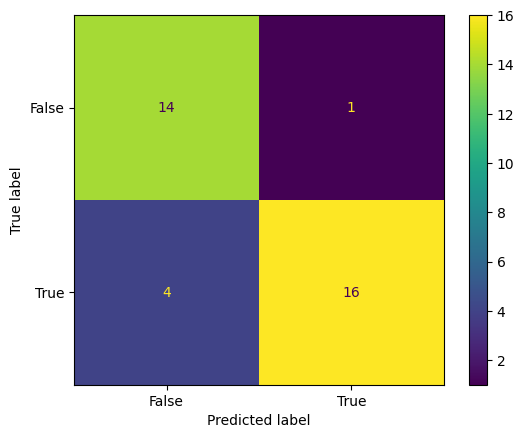

In [ ]:
# Creating the confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix =confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
plt.figure(figsize = (10,5))
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import  accuracy_score ,recall_score, precision_score, f1_score
f1 = f1_score(y_test, y_pred)
print(f1)

0.8648648648648648


In [ ]:
!pip install lazypredict

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split,cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, confusion_matrix, ConfusionMatrixDisplay ,recall_score, precision_score, f1_score, classification_report

import xgboost as xgb
from lightgbm import LGBMClassifier
import lazypredict
from lazypredict.Supervised import LazyClassifier

import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=3,
                     classifiers='all')

models, predictions = clf.fit(X_train_pca , X_test_pca , y_train , y_test)

100%|██████████| 29/29 [00:01<00:00, 27.90it/s]

[LightGBM] [Info] Number of positive: 69, number of negative: 70
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3120
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496403 -> initscore=-0.014389
[LightGBM] [Info] Start training from score -0.014389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.97,0.97,0.97,0.97,0.17
ExtraTreesClassifier,0.94,0.95,0.95,0.94,0.10
SVC,0.91,0.92,0.92,0.91,0.02
SGDClassifier,0.91,0.92,0.92,0.91,0.01
LGBMClassifier,0.89,0.89,0.89,0.89,0.11
GaussianNB,0.89,0.89,0.89,0.89,0.01
XGBClassifier,0.89,0.88,0.88,0.89,0.10
AdaBoostClassifier,0.86,0.88,0.88,0.86,0.12
DecisionTreeClassifier,0.86,0.88,0.88,0.86,0.01
